In [76]:
import plotly.express as px
import numpy as np


In [77]:
import pandas as pd
class DataLoader:
    """
    Data Loader
    """
    flavours = {
        'beef': 0,
        'chicken': 0,
        'mushroom': 0,
        'laksa': 0,
        'crab': 0,
        'chilli': 0,
        'pepper': 0,
        'tom yam': 0,
        'seafood': 0,
        'spicy': 0,
        'curry': 0,
        'kyushu white': 0,
        'thai': 0,
        'china': 0,
        'japan': 0,
        'tokyo': 0,
        'cream': 0,
        'sriacha': 0,
        'lime': 0,
        'hot': 0,
        'shrimp': 0,
        'tonkotsu': 0,
        'pork': 0,
        'lamb': 0,
        'oriental': 0,
        'tomato': 0
    }
    def __init__(self, filePath):
        """
        init and filter invalid data
        :param filePath: the path of the csv file
        """
        self.filePath = filePath
        self.data = pd.read_csv(filePath)
        self.data['Stars'] = self.data['Stars'].apply(lambda x: 0 if x=='Unrated' else float(x))

    def topReviewForEachItem(self):
        res = self.data.sort_values(by='Review #', ascending=False)
        return res

    def topReviewForEachBrand(self):
        """
        Top brands with the most popular ramens sorted by the number of review
        :return: DataFrame
        """
        res = self.data.groupby('Brand').agg({'Review #': 'sum'}).sort_values(by='Review #', ascending=False)
        return res

    def topStarForEachItem(self):
        """
        Top items sorted by stars
        :return: DataFrame
        """
        res = self.data.sort_values(by='Stars', ascending=False)
        return res


    def topMeanStarsForEachBrand(self):
        """
        Top brands with the most popular ramens sorted by mean of stars
        :return: DataFrame
        """
        res = self.data.groupby('Brand').agg({'Stars': 'mean'}).sort_values(by='Stars', ascending=False)
        return res

    def topCountryForMeanStars(self):
        """
        Top countries with the most popular ramens sorted by mean of stars
        :return: DataFrame
        """
        res = self.data.groupby('Country').agg({'Stars': 'mean'}).sort_values(by='Stars', ascending=False)
        return res

    def styleInCountry(self):
        """
        Record the number of each style consumed in each country
        dic[country][style] = a number
        :return: a dictionary
        """
        dic = {}
        for index, row in self.data.iterrows():
            if row['Country'] not in dic:
                dic[row['Country']] = {}
            else:
                dic[row['Country']][row['Style']] = dic[row['Country']].setdefault(row['Style'],0)+1
        return dic

    def topStyleInCountry(self):
        """
        The most popular styles in each country
        :return: a dictionary
        """
        dic = self.styleInCountry()
        res = {}
        for country, styles in dic.items():
            theMax = 0
            res[country] = []
            for style, number in styles.items():
                if number==theMax:
                    res[country].append((style,number))
                elif number>theMax:
                    theMax = number
                    res[country].clear()
                    res[country].append((style, number))
        return res

    def countFlavour(self, brand=None, country=None):
        """
        count the number of each similar flavour
        :param brand: default is None, meaning count all the brands in.
        It can receive a brand (string) to specify a brand
        :param country: default is None, meaning count all the countries in.
        It can receive a country (string) to specify a country
        :return: dictionary
        """

        flavours = dict(DataLoader.flavours)
        for index, row in self.data.iterrows():
            if brand:
                if row['Brand'] != brand:
                    continue
            if country:
                if row['Country'] != country:
                    continue
            words = row['Variety'].split()
            for word in words:
                if word.lower() in flavours:
                    flavours[word.lower()]+=1
        return flavours

    def topFlavourInEachCountry(self, brand = None):
        """
        find top flavour in each country, filtered by brand
        :param brand: default is None, it can specify a brand
        :return: dic
        """
        flavours = dict(DataLoader.flavours)
        dic = {}
        for index, row in self.data.iterrows():
            if brand:
                if row['Brand'] != brand:
                    continue
            country = row['Country']
            if country not in dic:
                dic[country] = dict(flavours)
            words = row['Variety'].split()
            for word in words:
                if word.lower() in flavours:
                    dic[country][word.lower()]+=1
        res = {}
        for country, fla in dic.items():
            count = 0
            temp = []
            for k, v in fla.items():
                if v>count:
                    temp.clear()
                    temp.append((k, v))
                    count = v
                elif v==count and v!=0:
                    temp.append((k,v))
            if temp:
                res[country] = list(temp)

        return res

    def topFlavourInEachBrand(self, country = None):
        """
        find top flavour in each brand, filtered by country
        :param country: default is None, it can specify a country
        :return: dic
        """
        flavours = dict(DataLoader.flavours)
        dic = {}
        for index, row in self.data.iterrows():
            if country:
                if row['Country'] != country:
                    continue
            brand = row['Brand']
            if brand not in dic:
                dic[brand] = dict(flavours)
            words = row['Variety'].split()
            for word in words:
                if word.lower() in flavours:
                    dic[brand][word.lower()]+=1
        res = {}
        for brand, fla in dic.items():
            count = 0
            temp = []
            for k, v in fla.items():
                if v>count:
                    temp.clear()
                    temp.append((k, v))
                    count = v
                elif v==count and v!=0:
                    temp.append((k,v))
            if temp:
                res[brand] = list(temp)

        return res


path = './ramen-ratings.csv'
dataLoader = DataLoader(path)
print(dataLoader.topFlavourInEachBrand('Japan'))

{'Acecook': [('tonkotsu', 3)], 'Nissin': [('tonkotsu', 9)], 'Fujiwara': [('crab', 3)], 'Maruchan': [('tonkotsu', 3)], 'Sokensha': [('curry', 1)], 'Takamori': [('curry', 1)], 'Tokyo Noodle': [('spicy', 2)], 'Ajinatori': [('chicken', 2)], 'Myojo': [('tonkotsu', 4), ('oriental', 4)], 'Marutai': [('tonkotsu', 5)], 'Sapporo Ichiban': [('shrimp', 1), ('tomato', 1)], 'Menraku': [('curry', 2)], 'Itomen': [('crab', 1)], 'Itsuki': [('spicy', 1)], 'Higashimaru': [('tonkotsu', 1)], 'Kuriki': [('beef', 1)], 'Torishi': [('tonkotsu', 1)], 'Samyang Foods': [('seafood', 1), ('curry', 1)], 'Unzen': [('mushroom', 1)], 'Oyatsu': [('chicken', 1)], 'Men-Sunaoshi': [('tonkotsu', 1)], 'Takamori Kosan': [('pepper', 1), ('spicy', 1), ('curry', 1)], 'Kimura': [('tonkotsu', 1)], 'Tokachimen Koubou': [('tonkotsu', 1), ('pork', 1)], 'Kumamoto': [('tonkotsu', 1)], 'Nagao Noodle': [('pork', 1)], 'Goku Uma': [('beef', 1), ('seafood', 1), ('spicy', 1), ('hot', 1)], 'Yamamoto': [('seafood', 1)], 'JFC': [('curry', 1)], '

In [78]:
data = pd.read_csv(path)


In [79]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [80]:
data.shape


(2580, 7)

In [81]:
booleans = []
for c in data.Country:
    if c == 'Japan':
        booleans.append(True)
    else:
        booleans.append(False)

In [82]:
is_japan = pd.Series(booleans)

In [83]:
is_japan.head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [84]:
data[is_japan]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,NaN
...,...,...,...,...,...,...,...
2554,26,Nissin,Soba Noodles With Mayo Mustard Squirt,Pack,Japan,4,NaN
2555,25,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,3,NaN
2556,24,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2,NaN
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012 #4


In [85]:
is_China = data.Country == 'China'

In [86]:
data[data.Country == 'China']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
33,2547,Sichuan Guangyou,Chongqing Spicy Hot Noodles,Bowl,China,4,NaN
49,2531,Uni-President,Pickled Cabbage Beef,Pack,China,4.25,NaN
77,2503,Sichuan Guangyou,Sweet Potato Instant Noodle Sout-Hot Flavor,Bowl,China,0,NaN
115,2465,Nissin,Cup Noodles XO Sauce Seafood,Cup,China,3.75,NaN
140,2440,Master Kong,Roasted Pork Noodle,Pack,China,4.5,NaN
...,...,...,...,...,...,...,...
2447,133,Baijia,Hot & Sour Rice Noodle,Pack,China,0,NaN
2490,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,China,2.3,NaN
2511,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,China,1.75,NaN
2525,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,China,1,NaN


In [87]:
# country, brand, style

In [88]:
data[data.Country == 'China']['Style']

33      Bowl
49      Pack
77      Bowl
115      Cup
140     Pack
        ... 
2447    Pack
2490    Pack
2511    Pack
2525    Pack
2526    Pack
Name: Style, Length: 169, dtype: object

In [89]:
data = [[10, 10, 0.84496124031007758],
        [10, 20, 0.87209302325581395],
        [10, 30, 0.88139534883720927],
        [20, 10, 0.86201550387596892],
        [20, 20, 0.87441860465116272],
        [20, 30, 0.88992248062015500],
        [30, 10, 0.87984496124031009],
        [30, 20, 0.89922480620155043],
        [30, 30, 0.92015503875968996]]

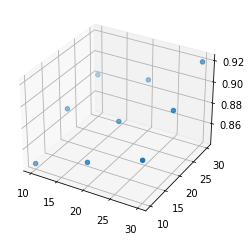

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = zip(*data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt     # for visualisation
import seaborn as sns     # for visualisation
from wordcloud import WordCloud    # for create word cloud
import random    # for use in random color in word cloud

import os

In [71]:
ramen_data = pd.read_csv(path)
ramen_data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [72]:
def transform_country(country_name):
    if country_name == 'Vietnam':
        return 'Viet Nam'
    elif country_name == 'Taiwan':
        return 'Taiwan, Province of China'
    elif country_name == 'USA':
        return 'United States'
    elif country_name == 'South Korea':
        return 'Korea, Republic of'
    elif country_name == 'UK':
        return 'United Kingdom'
    elif country_name == 'Holland':
        return 'Netherlands'
    else:
        return country_name


In [73]:
ramen_data['Country'] = ramen_data['Country'].map(transform_country)

In [74]:
ramen_data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,"Taiwan, Province of China",1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,United States,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,"Taiwan, Province of China",2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Viet Nam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [26]:
# Summarise ramen data
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,41
unique,NaN,355,2413,7,38,51,38
top,NaN,Nissin,Beef,Pack,Japan,4,\n
freq,NaN,381,7,1531,352,384,4
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# View the type of Stars column
print(ramen_data['Stars'].describe())

count     2580
unique      51
top          4
freq       384
Name: Stars, dtype: object


In [28]:
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors = 'coerce')
ramen_data.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2577.000000,41
unique,NaN,355,2413,7,38,NaN,38
top,NaN,Nissin,Beef,Pack,Japan,NaN,\n
freq,NaN,381,7,1531,352,NaN,4
mean,1290.500000,NaN,NaN,NaN,NaN,3.654676,NaN
std,744.926171,NaN,NaN,NaN,NaN,1.015331,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.250000,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.750000,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,4.250000,NaN


In [29]:
print(ramen_data['Stars'].describe())

count    2577.000000
mean        3.654676
std         1.015331
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64


In [33]:
# Count the amount of brand that got review
ramen_brand = ramen_data.groupby(['Brand','Country']).agg({'Review #':'count'})
ramen_brand = ramen_brand.reset_index() 
ramen_brand = ramen_brand.sort_values('Review #', ascending = False)

In [34]:
# Count brand from each country that got review
ramen_coun = ramen_brand.groupby('Country').agg({'Brand':'count'}).reset_index()
ramen_coun = ramen_coun.rename(columns = {'Brand':'Amount of brand'})
ramen_coun = ramen_coun.sort_values(['Amount of brand', 'Country'], ascending = [False, True])

In [35]:
# View the top 10 countries which have the most amount of ramen brand
ramen_coun.head(10)

,Country,Amount of brand
18,Japan,58
35,USA,49
32,Taiwan,47
30,South Korea,35
5,China,33
19,Malaysia,32
33,Thailand,24
17,Indonesia,19
37,Vietnam,19
14,Hong Kong,12


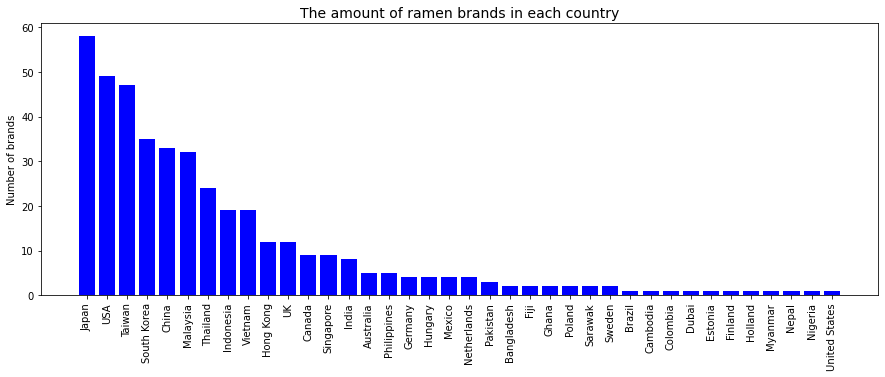

In [38]:
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Amount of brand', data = ramen_coun, color = 'blue')
plt.title( 'The amount of ramen brands in each country', fontsize=14)
plt.ylabel('Number of brands')
plt.xticks(rotation = 90)
plt.show()

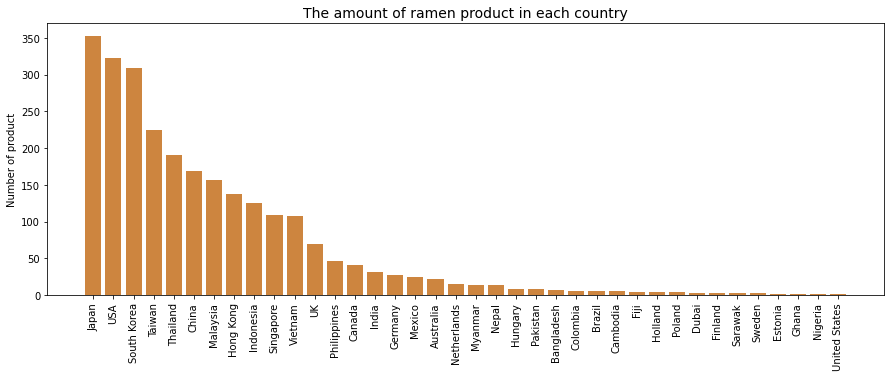

In [40]:
# Present the variety of each countries that got reviewed
ramen_variety = ramen_data.groupby(['Country']).agg({'Variety':'count'})
ramen_variety = ramen_variety.reset_index() 
ramen_variety = ramen_variety.sort_values(['Variety','Country'], ascending = [False, True])
ramen_variety = ramen_variety.rename(columns = {'Variety': 'Country variety'})

# Bar chart of the amount of ramen products in each country that got reviewed
plt.figure(figsize=(15, 5))
plt.bar('Country', 'Country variety', data = ramen_variety, color = 'peru')
plt.title( 'The amount of ramen product in each country', fontsize=14)
plt.ylabel('Number of product')
plt.xticks(rotation = 90)
plt.show()

In [91]:
gapminder = px.data.gapminder().query("year==2007")



gapminder['average rating'] = gapminder.apply(lambda row: normalize_rowII(row), axis=1) 

fig = px.choropleth(gapminder, locations="iso_alpha",
                    color='average rating', 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

NameError: name 'normalize_rowII' is not defined